In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create random latitude and longitude sets
lats = np.random.uniform(low=-90.000,high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)


In [3]:
#Adding combined lat & long to list
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

SyntaxError: invalid syntax (Temp/ipykernel_38400/2565926391.py, line 5)

In [8]:
# Create an endpoint URL for a city
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 30.58,
  'feels_like': 27.72,
  'temp_min': 26.94,
  'temp_max': 33.53,
  'pressure': 1012,
  'humidity': 50},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 146, 'gust': 8.01},
 'clouds': {'all': 20},
 'dt': 1643053998,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643025906,
  'sunset': 1643060836},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
# Retrieve Json data for Boston example
boston_data = city_weather.json()

In [10]:
# Specific dictionary retrieval of Boston JSON
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1643025906,
 'sunset': 1643060836}

In [11]:
# Specific Data Retrival of Boston Json
boston_data['sys']['country']

'US'

In [12]:
boston_data['dt']

1643053998

In [13]:
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat,lng,max_temp,humidity,clouds,wind)

42.3584 -71.0598 33.53 50 20 3


In [14]:
#Import the datetime module from the datetime library
from datetime import datetime
# Get data from json file
date = boston_data['dt']
# convert the UTC date to a date format with year, month, day hours, min
datetime.utcfromtimestamp(date)
# Adding stringformatting to the time
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')


'2022-01-24 19:53:18'

# Getting City Weather Data 6.2.6

In [15]:
#Import the time library and the datetime module from the datetime library
import time 
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        # Run an API request for each of the cities . 
    try:
        #Parse the Json and retrieve data. 
        city_weather = requests.get(city_url).json()
        #Parse out required data 
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert The Date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Add teh city information into the city data lists
        city_data.append({"city": city.title(),
                         'Lat': city_lat,
                         'Long': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
# If an error occurs, skip the city. 
    except:
        print('City Not Found. Skipping...')
        pass
    
# Indicate the data reading and load is completed
print('-----------------------------------')
print('Data Retrival Complete')
print('-----------------------------------')




Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | xadani
City Not Found. Skipping...
Processing Record 3 of Set 1 | meulaboh
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | illoqqortoormiut
City Not Found. Skipping...
Processing Record 6 of Set 1 | monduli
Processing Record 7 of Set 1 | moa
Processing Record 8 of Set 1 | ambon
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | gayeri
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | rawson
Processing Record 18 of Set 1 | langenburg
Processing Record 19 of Set 1 | flinders
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | saskylakh
Processing Record 23 of Se

Processing Record 39 of Set 4 | muhos
Processing Record 40 of Set 4 | bababe
City Not Found. Skipping...
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | attawapiskat
City Not Found. Skipping...
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | vaini
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | avera
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | kukushtan
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | senmonorom
City Not Found. Skipping...
Processing Record 1 of Set 5 | mujiayingzi
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | barentsburg
City Not Found. Skipping...
Processing Record 4 of Set 5 | cockburn town
Processing Record 5 of Set 5 | dong hoi
Processing Record 6 of Set 5 | tubinskiy
Processing Record 7 of Set 5 | kapfenberg
Processing Record 8 of Set 5 | samsun
Processing Record 9 of Set 5 | sydney mines
Processing Record 10 of Set 

Processing Record 28 of Set 8 | namie
Processing Record 29 of Set 8 | polovinnoye
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | fuling
Processing Record 32 of Set 8 | krasnoselkup
Processing Record 33 of Set 8 | villazon
Processing Record 34 of Set 8 | malanje
Processing Record 35 of Set 8 | lagunas
Processing Record 36 of Set 8 | mayo
Processing Record 37 of Set 8 | corpus christi
Processing Record 38 of Set 8 | ancud
Processing Record 39 of Set 8 | yellowknife
Processing Record 40 of Set 8 | alofi
Processing Record 41 of Set 8 | belmonte
Processing Record 42 of Set 8 | kodinsk
Processing Record 43 of Set 8 | neyvo-shaytanskiy
Processing Record 44 of Set 8 | saleaula
City Not Found. Skipping...
Processing Record 45 of Set 8 | wuwei
Processing Record 46 of Set 8 | shitanjing
Processing Record 47 of Set 8 | bantry
Processing Record 48 of Set 8 | baghdad
Processing Record 49 of Set 8 | san patricio
Processing Record 50 of Set 8 | kieta
Processing Record 1 of Set 

Processing Record 18 of Set 12 | dudinka
Processing Record 19 of Set 12 | odweyne
Processing Record 20 of Set 12 | visnes
Processing Record 21 of Set 12 | xiongshi
City Not Found. Skipping...
Processing Record 22 of Set 12 | puerto baquerizo moreno
Processing Record 23 of Set 12 | charlestown
Processing Record 24 of Set 12 | teguldet
Processing Record 25 of Set 12 | sitka
Processing Record 26 of Set 12 | viransehir
Processing Record 27 of Set 12 | moses lake
Processing Record 28 of Set 12 | palmer
Processing Record 29 of Set 12 | kingaroy
Processing Record 30 of Set 12 | luganville
Processing Record 31 of Set 12 | usakos
Processing Record 32 of Set 12 | centerville
Processing Record 33 of Set 12 | xai-xai
Processing Record 34 of Set 12 | mabaruma
Processing Record 35 of Set 12 | kazachinskoye
Processing Record 36 of Set 12 | gagarin
Processing Record 37 of Set 12 | macaboboni
City Not Found. Skipping...
Processing Record 38 of Set 12 | galesong
Processing Record 39 of Set 12 | shihezi


In [17]:
#Convert the array of dictionaries to a pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,city,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Velha,-20.3297,-40.2925,85.95,66,20,8.99,BR,2022-01-24 19:52:44
1,Meulaboh,4.1363,96.1285,74.95,90,68,3.96,ID,2022-01-24 19:57:03
2,Jamestown,42.0970,-79.2353,21.09,62,100,7.00,US,2022-01-24 19:53:18
3,Monduli,-3.3000,36.4500,65.41,67,87,6.29,TZ,2022-01-24 19:57:03
4,Moa,20.6569,-74.9403,77.76,74,45,9.51,CU,2022-01-24 19:57:03
5,Ambon,-3.6954,128.1814,75.34,94,20,3.44,ID,2022-01-24 19:57:04
6,Punta Arenas,-53.1500,-70.9167,59.02,51,0,51.79,CL,2022-01-24 19:57:04
7,Port Elizabeth,-33.9180,25.5701,72.10,83,20,31.07,ZA,2022-01-24 19:57:04
8,Bambous Virieux,-20.3428,57.7575,79.05,69,40,13.80,MU,2022-01-24 19:57:05
9,Gayeri,12.6497,0.4931,73.63,11,0,9.31,BF,2022-01-24 19:57:05


In [18]:
new_column_order = ['city', 'Country', 'Date', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,city,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila Velha,BR,2022-01-24 19:52:44,-20.3297,-40.2925,85.95,66,20,8.99
1,Meulaboh,ID,2022-01-24 19:57:03,4.1363,96.1285,74.95,90,68,3.96
2,Jamestown,US,2022-01-24 19:53:18,42.0970,-79.2353,21.09,62,100,7.00
3,Monduli,TZ,2022-01-24 19:57:03,-3.3000,36.4500,65.41,67,87,6.29
4,Moa,CU,2022-01-24 19:57:03,20.6569,-74.9403,77.76,74,45,9.51
...,...,...,...,...,...,...,...,...,...
560,Rosarito,MX,2022-01-24 20:10:06,32.3333,-117.0333,75.63,45,0,5.64
561,Kurilsk,RU,2022-01-24 20:12:04,45.2333,147.8833,23.43,70,94,12.46
562,Adrar,MR,2022-01-24 20:12:04,20.5022,-10.0711,73.62,17,100,8.48
563,Aldan,RU,2022-01-24 20:12:04,58.6031,125.3894,-9.71,99,92,4.72


In [19]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
city_data_df['Lat'].count()

565

In [25]:
city_data_df['Humidity'].count()

565

In [26]:
print(city_data_df['Lat'].shape)

(565,)


In [27]:
print(city_data_df['Humidity'].shape)

(565,)


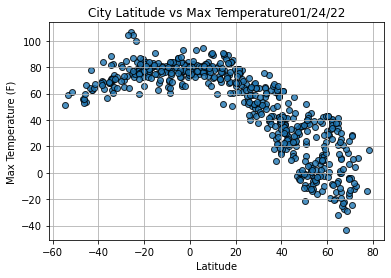

In [36]:
# import the time module
import time
# Build Scatterpot for lattitude vs max temp
plt.scatter(lats,max_temps,edgecolor='black',linewidths=1, marker="o", alpha = .8, label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

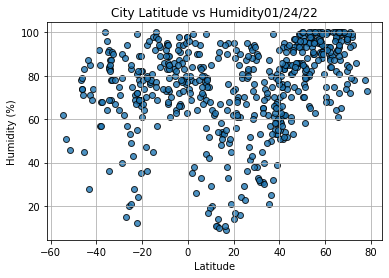

In [37]:
# Build Scatterpot for lattitude vs humidity
plt.scatter(lats,humidity,edgecolor='black',linewidths=1, marker="o", alpha = .8, label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs Humidity' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

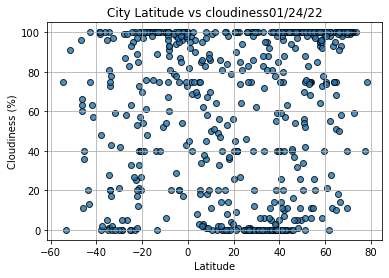

In [38]:
# Build Scatterpot for lattitude vs cloudiness
plt.scatter(lats,cloudiness,edgecolor='black',linewidths=1, marker="o", alpha = .8, label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs cloudiness' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

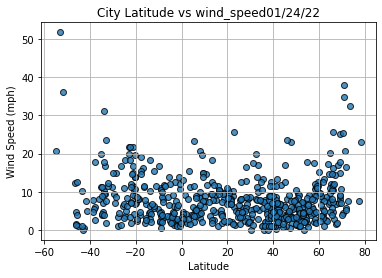

In [39]:
# Build Scatterpot for lattitude vs wind_speed
plt.scatter(lats,wind_speed,edgecolor='black',linewidths=1, marker="o", alpha = .8, label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs wind_speed' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

In [70]:
#import linear regression from SciPy
from scipy.stats import linregress

# Create a function to perform linear regression on teh weather data and plot a regression line and the equation with the date
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

#Perform the linear regression -HEMISPHERE REGRESSION
    (slope,intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

#Calculate the regression of the line 'yvalues' from the slope and the intercept.
    regress_values = x_values * slope + intercept

#Get teh equation of the lines

    line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create a scatterplot 
    plt.scatter(x_values, y_values)

#Plot the regression line with the x_values and y coordinates
    plt.plot(x_values,regress_values,'r')

#Annotate teh text for line equation and coordinates
    plt.annotate(line_eq, (10,40), fontsize = 15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()


# Create Hemisphere Data

In [46]:
index13 = city_data_df.loc[13]
index13

city                  Port Alfred
Country                        ZA
Date          2022-01-24 19:57:06
Lat                      -33.5906
Long                       26.891
Max Temp                    70.36
Humidity                       87
Cloudiness                     17
Wind Speed                  16.87
Name: 13, dtype: object

In [47]:
city_data_df['Lat']>=0

0      False
1       True
2       True
3      False
4       True
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [50]:
n_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
n_hemi_df.head()

,city,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
1,Meulaboh,ID,2022-01-24 19:57:03,4.1363,96.1285,74.95,90,68,3.96
2,Jamestown,US,2022-01-24 19:53:18,42.0970,-79.2353,21.09,62,100,7.00
4,Moa,CU,2022-01-24 19:57:03,20.6569,-74.9403,77.76,74,45,9.51
9,Gayeri,BF,2022-01-24 19:57:05,12.6497,0.4931,73.63,11,0,9.31
11,Sao Filipe,CV,2022-01-24 19:57:06,14.8961,-24.4956,78.01,54,81,7.83


In [51]:
n_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
s_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Hemisphere Linear regression

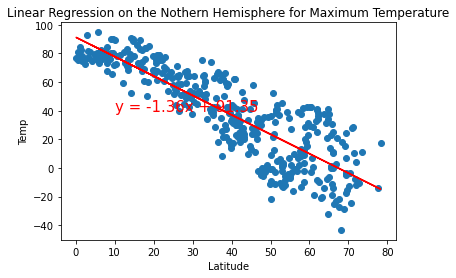

In [58]:
# Linear Regression on the Norhtern Hemi
x_values = n_hemi_df['Lat']
y_values = n_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere for Maximum Temperature', 'Max Temp', (10,40) )


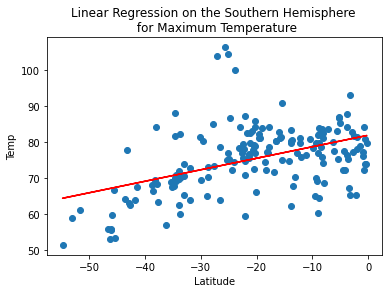

In [84]:
# Linear Regression on the Norhtern Hemi
x_values = s_hemi_df['Lat']
y_values = s_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))


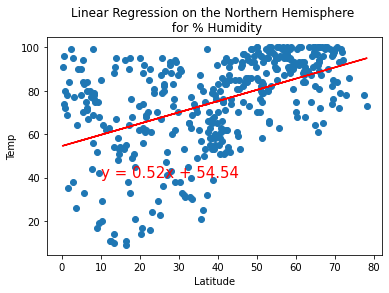

In [85]:
# Linear regression on the Northern Hemisphere
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,70))

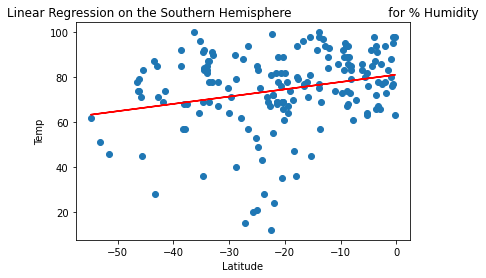

In [69]:
# Linear regression on the Northern Hemisphere
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

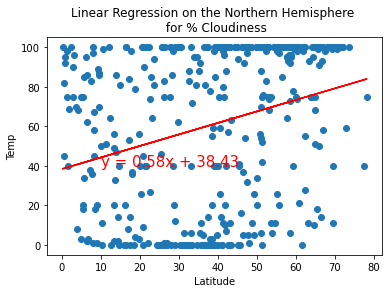

In [82]:
# Linear regression on the Northern Hemisphere
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,70))

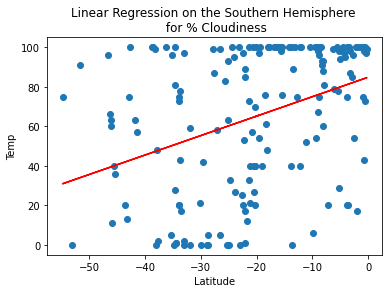

In [83]:
# Linear regression on the Northern Hemisphere
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

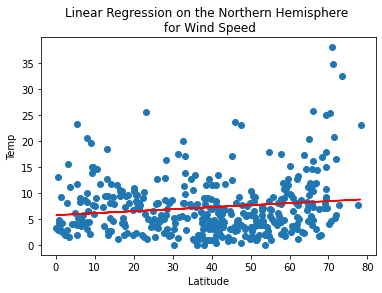

In [86]:
# Linear regression on the Northern Hemisphere
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

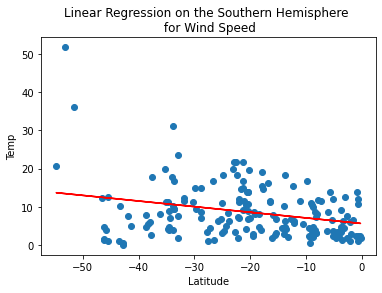

In [87]:
# Linear regression on the Northern Hemisphere
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))